Goals of this project:
1. How much impact does being late or too spaced out at the first stop have downstream?
2. What is the impact of the layover at the start of the trip (the difference between the first top arrival and departure time)? Does more layover lead to more stable headways (lower values for % headway deviation)?
3. How closely does lateness (ADHERENCE) correlate to headway?
4. What is the relationship between distance or time travelled since the start of a given trip and the headway deviation? Does headway become less statble the further along the route the bus has travelled?
5. How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.
6. How does direction of travel, route, or location affect the headway and on-time performance?
7. How does time of day or day of week affect headway and on-time performance? Can you detect an impact of school schedule on headway deviation (for certain routes and at certain times of day)?
8. Does weather have any effect on headway or on-time performance? To help answer this question, the file bna_2022.csv contains historical weather data recorded at Nashville International Airport.

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import date
from datetime import datetime
plt.style.use('ggplot')

%matplotlib inline

### Access, Display DataFrames

In [4]:
# Access 'Headway Data.csv'
headway = pd.read_csv('../data/Headway Data.csv')
headway.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,HBHS,4.0,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,0,0,1,0,0.0,0,2,12.650000
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,21BK,3.0,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,0,0,1,0,0.0,0,11,0.000000
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,MCC5_9,2.0,2,36.167091,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,0,1,0,0,NaN,0,23,22.416666
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MLKS,7.0,1,36.161008,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,0,0,1,0,0.0,0,24,5.766666
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MCC5_11,5.0,2,36.167091,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,0,0,1,0,NaN,0,25,0.000000


In [3]:
# Access 'bna_2022.csv'
bna_2022 = pd.read_csv('../data/bna_2022.csv')
bna_2022.head()

,key,class,expire_time_gmt,obs_id,obs_name,valid_time_gmt,day_ind,temp,wx_icon,icon_extd,wx_phrase,pressure_tend,pressure_desc,dewPt,heat_index,rh,pressure,vis,wc,wdir,wdir_cardinal,gust,wspd,max_temp,min_temp,precip_total,precip_hrly,snow_hrly,uv_desc,feels_like,uv_index,qualifier,qualifier_svrty,blunt_phrase,terse_phrase,clds,water_temp,primary_wave_period,primary_wave_height,primary_swell_period,primary_swell_height,primary_swell_direction,secondary_swell_period,secondary_swell_height,secondary_swell_direction
0,KBNA,observation,1641027180,KBNA,Nashville,1641019980,N,71,26,2600,Cloudy,NaN,NaN,63,71,75,29.10,10.0,71.0,200.0,SSW,21.0,13.0,NaN,NaN,NaN,0.0,NaN,Low,71.0,0.0,NaN,NaN,NaN,NaN,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KBNA,observation,1641030780,KBNA,Nashville,1641023580,N,72,26,2600,Cloudy,NaN,NaN,63,72,73,29.10,10.0,72.0,210.0,SSW,21.0,12.0,NaN,NaN,NaN,0.0,NaN,Low,72.0,0.0,NaN,NaN,NaN,NaN,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KBNA,observation,1641034380,KBNA,Nashville,1641027180,N,73,26,2600,Cloudy,0.0,Steady,63,73,71,29.11,10.0,73.0,210.0,SSW,26.0,12.0,NaN,NaN,NaN,0.0,NaN,Low,73.0,0.0,NaN,NaN,NaN,NaN,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KBNA,observation,1641037980,KBNA,Nashville,1641030780,N,73,26,2600,Cloudy,NaN,NaN,62,73,68,29.10,10.0,73.0,200.0,SSW,30.0,18.0,NaN,NaN,NaN,0.0,NaN,Low,73.0,0.0,NaN,NaN,NaN,NaN,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KBNA,observation,1641041580,KBNA,Nashville,1641034380,N,73,26,2600,Cloudy,NaN,NaN,61,73,66,29.11,10.0,73.0,220.0,SW,23.0,10.0,NaN,NaN,NaN,0.0,NaN,Low,73.0,0.0,NaN,NaN,NaN,NaN,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Access 'bna_weather.csv'
bna_weather = pd.read_csv('../data/bna_weather.csv')
bna_weather.head()

,Date,key,class,expire_time_gmt,obs_id,obs_name,valid_time_gmt,day_ind,temp,wx_icon,icon_extd,wx_phrase,pressure_tend,pressure_desc,dewPt,heat_index,rh,pressure,vis,wc,wdir,wdir_cardinal,gust,wspd,max_temp,min_temp,precip_total,precip_hrly,snow_hrly,uv_desc,feels_like,uv_index,qualifier,qualifier_svrty,blunt_phrase,terse_phrase,clds,water_temp,primary_wave_period,primary_wave_height,primary_swell_period,primary_swell_height,primary_swell_direction,secondary_swell_period,secondary_swell_height,secondary_swell_direction
0,2021-11-01 00:53:00,KBNA,observation,1635753180,KBNA,Nashville,1635745980,N,51,26,2600,Cloudy,1.0,Rising,43,51,74,29.59,10.0,51.0,360.0,N,NaN,9.0,68.0,51.0,NaN,0.0,NaN,Low,51.0,0.0,NaN,NaN,NaN,NaN,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-11-01 01:30:00,KBNA,observation,1635755400,KBNA,Nashville,1635748200,N,50,29,2900,Partly Cloudy,NaN,NaN,42,50,74,29.59,10.0,50.0,350.0,N,NaN,8.0,NaN,NaN,NaN,0.0,NaN,Low,50.0,0.0,NaN,NaN,NaN,NaN,SCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-11-01 01:53:00,KBNA,observation,1635756780,KBNA,Nashville,1635749580,N,49,33,3300,Fair,NaN,NaN,42,49,77,29.59,10.0,47.0,350.0,N,NaN,6.0,NaN,NaN,NaN,0.0,NaN,Low,47.0,0.0,NaN,NaN,NaN,NaN,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-11-01 02:53:00,KBNA,observation,1635760380,KBNA,Nashville,1635753180,N,48,33,3300,Fair,NaN,NaN,41,48,77,29.60,10.0,48.0,360.0,N,NaN,3.0,NaN,NaN,NaN,0.0,NaN,Low,48.0,0.0,NaN,NaN,NaN,NaN,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-11-01 03:53:00,KBNA,observation,1635763980,KBNA,Nashville,1635756780,N,47,33,3300,Fair,1.0,Rising Rapidly,41,47,80,29.61,10.0,47.0,NaN,CALM,NaN,0.0,NaN,NaN,NaN,0.0,NaN,Low,47.0,0.0,NaN,NaN,NaN,NaN,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory Data Analysis

#### Categorical Variables (Bus Routes)

Look for data types using `.info()`

In [5]:
headway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981715 entries, 0 to 1981714
Data columns (total 30 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   CALENDAR_ID                int64  
 1   SERVICE_ABBR               int64  
 2   ADHERENCE_ID               int64  
 3   DATE                       object 
 4   ROUTE_ABBR                 int64  
 5   BLOCK_ABBR                 int64  
 6   OPERATOR                   int64  
 7   TRIP_ID                    int64  
 8   OVERLOAD_ID                int64  
 9   ROUTE_DIRECTION_NAME       object 
 10  TIME_POINT_ABBR            object 
 11  ROUTE_STOP_SEQUENCE        float64
 12  TRIP_EDGE                  int64  
 13  LATITUDE                   float64
 14  LONGITUDE                  float64
 15  SCHEDULED_TIME             object 
 16  ACTUAL_ARRIVAL_TIME        object 
 17  ACTUAL_DEPARTURE_TIME      object 
 18  ADHERENCE                  float64
 19  SCHEDULED_HDWY             float64
 20  AC

Count null values using `.isna().sum()`

In [6]:
headway.isna().sum()

CALENDAR_ID                       0
SERVICE_ABBR                      0
ADHERENCE_ID                      0
DATE                              0
ROUTE_ABBR                        0
BLOCK_ABBR                        0
OPERATOR                          0
TRIP_ID                           0
OVERLOAD_ID                       0
ROUTE_DIRECTION_NAME              0
TIME_POINT_ABBR                   0
ROUTE_STOP_SEQUENCE              41
TRIP_EDGE                         0
LATITUDE                          0
LONGITUDE                         0
SCHEDULED_TIME                    0
ACTUAL_ARRIVAL_TIME           54383
ACTUAL_DEPARTURE_TIME         54430
ADHERENCE                     54430
SCHEDULED_HDWY               432294
ACTUAL_HDWY                  473824
HDWY_DEV                     474368
ADJUSTED_EARLY_COUNT              0
ADJUSTED_LATE_COUNT               0
ADJUSTED_ONTIME_COUNT             0
STOP_CANCELLED                    0
PREV_SCHED_STOP_CANCELLED    402647
IS_RELIEF                   

In [7]:
# Identify the number of bus routes values within the dataset
headway['ROUTE_ABBR'].value_counts()

55    362259
56    355098
52    291150
23    250787
50    249880
3     216446
22    153074
7     103021
Name: ROUTE_ABBR, dtype: int64

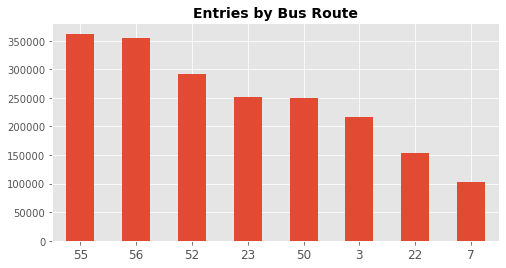

In [8]:
# Display the number of entries within the dataset
headway['ROUTE_ABBR'].value_counts().plot(kind = 'bar',
                                         figsize = (8,4))

plt.xticks(rotation = 0,
           fontsize = 12)                   
plt.title('Entries by Bus Route',
         fontsize = 14,
         fontweight = 'bold');

#### Numeric Variables

In [9]:
# Display the mean, median, max, min, standard deviation, and quartiles of adherence to the schedule
headway['ADHERENCE'].describe()

count    1.927285e+06
mean    -2.193849e+00
std      4.886912e+00
min     -5.067667e+02
25%     -3.400000e+00
50%     -1.383333e+00
75%     -1.333330e-01
max      7.883333e+01
Name: ADHERENCE, dtype: float64

### Edit, Transform

In [10]:
# Make a new 'headway' DataFrame with only the columns needed
headway_slim = headway.drop(headway.iloc[:, 22:30],axis = 1)
headway_slim.head(19)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,HBHS,4.0,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,21BK,3.0,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,MCC5_9,2.0,2,36.167091,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MLKS,7.0,1,36.161008,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MCC5_11,5.0,2,36.167091,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN
5,120211101,1,76447969,2021-11-01,22,2200,1352,298143,0,TO DOWNTOWN,MHSP,15.0,1,36.178360,-86.845441,04:42:00,04:29:30,04:41:50,0.166666,NaN,NaN,NaN
6,120211101,1,76447970,2021-11-01,22,2200,1352,298143,0,TO DOWNTOWN,ELIZ,11.0,0,36.193454,-86.839981,04:46:00,04:46:58,04:46:58,-0.966666,NaN,NaN,NaN
7,120211101,1,76447971,2021-11-01,22,2200,1352,298143,0,TO DOWNTOWN,CV23,6.0,0,36.182177,-86.814445,04:54:00,04:55:00,04:55:00,-1.000000,NaN,NaN,NaN
8,120211101,1,76447972,2021-11-01,22,2200,1352,298143,0,TO DOWNTOWN,MCC5_12,4.0,2,36.167091,-86.781923,05:10:00,05:05:26,05:05:26,4.566666,NaN,NaN,NaN
9,120211101,1,76447973,2021-11-01,22,2200,1352,298162,0,FROM DOWNTOWN,MCC5_12,4.0,1,36.167091,-86.781923,05:15:00,05:05:26,05:16:49,-1.816666,NaN,NaN,NaN


In [11]:
headway_slim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981715 entries, 0 to 1981714
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   CALENDAR_ID            int64  
 1   SERVICE_ABBR           int64  
 2   ADHERENCE_ID           int64  
 3   DATE                   object 
 4   ROUTE_ABBR             int64  
 5   BLOCK_ABBR             int64  
 6   OPERATOR               int64  
 7   TRIP_ID                int64  
 8   OVERLOAD_ID            int64  
 9   ROUTE_DIRECTION_NAME   object 
 10  TIME_POINT_ABBR        object 
 11  ROUTE_STOP_SEQUENCE    float64
 12  TRIP_EDGE              int64  
 13  LATITUDE               float64
 14  LONGITUDE              float64
 15  SCHEDULED_TIME         object 
 16  ACTUAL_ARRIVAL_TIME    object 
 17  ACTUAL_DEPARTURE_TIME  object 
 18  ADHERENCE              float64
 19  SCHEDULED_HDWY         float64
 20  ACTUAL_HDWY            float64
 21  HDWY_DEV               float64
dtypes: float64(7), int

In [12]:
# # Drop NaN values from the 'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV' columns
# headway_slim.dropna(subset=['SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV'])
# # Show one to/from round to define impact
# headway_slim.head(10)

In [13]:
# Verify that NaN values have been dropped from DataFrame
headway_slim.isna().sum()

CALENDAR_ID                   0
SERVICE_ABBR                  0
ADHERENCE_ID                  0
DATE                          0
ROUTE_ABBR                    0
BLOCK_ABBR                    0
OPERATOR                      0
TRIP_ID                       0
OVERLOAD_ID                   0
ROUTE_DIRECTION_NAME          0
TIME_POINT_ABBR               0
ROUTE_STOP_SEQUENCE          41
TRIP_EDGE                     0
LATITUDE                      0
LONGITUDE                     0
SCHEDULED_TIME                0
ACTUAL_ARRIVAL_TIME       54383
ACTUAL_DEPARTURE_TIME     54430
ADHERENCE                 54430
SCHEDULED_HDWY           432294
ACTUAL_HDWY              473824
HDWY_DEV                 474368
dtype: int64

#### Q1:
How much impact does being late or too spaced out at the first stop have downstream?

#### ADHERENCE quartiles

In [14]:
# # Identify the quartiles for 'ADHERENCE' ('ACTUAL_DEPARTURE_TIME' - 'SCHEDULED_TIME')
# headway_slim['ADHERENCE'].describe()

In [15]:
# # For loop to identify  'ADHERENCE' ('ACTUAL_DEPARTURE_TIME' - 'SCHEDULED_TIME') quartile
# # Consider an alternative to iterrows() to increase efficiency such as use for loop to create list, add list to DataFrame
# headway_slim['ADHERENCE_QUARTILE'] = ''
# for ind, row in headway_slim.iterrows():
#     value = row['ADHERENCE']
#     if pd.isna(value):
#         headway_slim.loc[ind, 'ADHERENCE_QUARTILE'] = 'N/A'
#     elif value < -3.4:
#         headway_slim.loc[ind, 'ADHERENCE_QUARTILE'] = 'Slowest 25% Quartile'
#     elif value < -1.383:
#         headway_slim.loc[ind, 'ADHERENCE_QUARTILE'] = 'Median'
#     elif value < -1.333333:
#         headway_slim.loc[ind, 'ADHERENCE_QUARTILE'] = '50% - 75% Quartile'
#     else:
#         headway_slim.loc[ind, 'ADHERENCE_QUARTILE'] = 'Fastest 25% Quartile'
# headway_slim.head()

In [16]:
# # Group 'ADHERENCE' averages by 'ADHERENCE_QUARTILE' and 'TRIP_EDGE'
# headway_quartile = headway_slim.groupby(['ADHERENCE_QUARTILE', 'TRIP_EDGE']).agg({'ADHERENCE':['mean']})
# headway_quartile

In [17]:
# # Group 'ADHERENCE' averages by 'ADHERENCE_QUARTILE','TRIP_EDGE', 'ROUTE_ABBR'
# headway_quartile = headway_slim.groupby(['ADHERENCE_QUARTILE', 'TRIP_EDGE', 'ROUTE_ABBR']).agg({'ADHERENCE':['mean']})
# headway_quartile

#### HDWY_DEV quartiles

In [18]:
# # Identify the quartiles for 'HDWY_DEV' ('ACTUAL_HDWY' - 'SCHEDULED_HDWY')
# headway_slim['HDWY_DEV'].describe()

In [19]:
# # For loop to identify  'HDWY_DEV' ('ACTUAL_HDWY' - 'SCHEDULED_HDWY') quartile
# # Identify 'NaN' values and assign them 'N/A'
# # Assign a quartile value to the rest of values that are not 'NaN'
# headway_slim['HDWY_QUARTILE'] = ''
# for ind, row in headway_slim.iterrows():
#     value = row['HDWY_DEV']
#     if pd.isnull(value):
#         headway_slim.loc[ind, 'HDWY_QUARTILE'] = 'N/A'
#     elif value < -1.88:
#         headway_slim.loc[ind, 'HDWY_QUARTILE'] = 'Slowest 25% Quartile'
#     elif value < 0:
#         headway_slim.loc[ind, 'HDWY_QUARTILE'] = 'Median'
#     elif value < 1.9666666:
#         headway_slim.loc[ind, 'HDWY_QUARTILE'] = '50% - 75% Quartile'
#     else:
#         headway_slim.loc[ind, 'HDWY_QUARTILE'] = 'Fastest 25% Quartile'
# headway_slim.head()

In [20]:
# # Group 'HDWY_DEV' averages by 'HDWY_QUARTILE' and 'TRIP_EDGE'
# headway_quartile = headway_slim.groupby(['HDWY_QUARTILE', 'TRIP_EDGE']).agg({'HDWY_DEV':['mean']})
# headway_quartile

#### Q2:
> What is the impact of the layover at the start of the trip (the difference between the first stop arrival and departure time)?

> Does more layover lead to more stable headways (lower values for % headway deviation)?

In [48]:
# Create a dataframe with selected columns from original dataset
impact_df = headway[['ROUTE_ABBR', 'TRIP_EDGE', 'ADHERENCE', 'DWELL_IN_MINS', 'ACTUAL_DEPARTURE_TIME', 'ACTUAL_ARRIVAL_TIME']]
impact_df.head()

,ROUTE_ABBR,TRIP_EDGE,ADHERENCE,DWELL_IN_MINS,ACTUAL_DEPARTURE_TIME,ACTUAL_ARRIVAL_TIME
0,7,1,-2.000000,12.650000,14:12:00,13:59:21
1,7,0,-3.350000,0.000000,14:23:21,14:23:21
2,7,2,-20.183333,22.416666,14:59:11,14:36:46
3,50,1,-0.283333,5.766666,15:10:17,15:04:31
4,50,2,10.016666,0.000000,15:16:59,15:16:59


In [49]:
impact_df.describe()

,ROUTE_ABBR,TRIP_EDGE,ADHERENCE,DWELL_IN_MINS
count,1.981715e+06,1.981715e+06,1.927285e+06,1.927259e+06
mean,3.933449e+01,5.848394e-01,-2.193849e+00,2.856618e+00
std,1.969928e+01,7.959966e-01,4.886912e+00,5.986122e+00
min,3.000000e+00,0.000000e+00,-5.067667e+02,-1.135833e+02
25%,2.300000e+01,0.000000e+00,-3.400000e+00,0.000000e+00
50%,5.200000e+01,0.000000e+00,-1.383333e+00,0.000000e+00
75%,5.500000e+01,1.000000e+00,-1.333330e-01,2.183333e+00
max,5.600000e+01,2.000000e+00,7.883333e+01,4.271667e+02


In [54]:
DWELL_GROUPS = []

for x in impact_df['DWELL_IN_MINS']:
    if x < 0:
        DWELL_GROUPS.append('Less Than 0')
    elif x >= 0 and x <= 2:
        DWELL_GROUPS.append('0 to 2 MIN')
    elif x > 2 and x <= 4:
        DWELL_GROUPS.append('2 to 4 MIN')
    elif x > 4 and x <= 6:
        DWELL_GROUPS.append('4 to 6 MIN')
    elif x > 6 and x <= 8:
        DWELL_GROUPS.append('6 to 8 MIN')
    elif x > 8 and x <= 10:
        DWELL_GROUPS.append('8 to 10 MIN')
    elif x > 10 and x <= 12:
        DWELL_GROUPS.append('10 to 12 MIN')
    elif x > 12 and x <= 14:
        DWELL_GROUPS.append('12 to 14 MIN')
    elif x > 14 and x <= 16:
        DWELL_GROUPS.append('14 to 16 MIN')
    else:
        DWELL_GROUPS.append('16+ MIN')
DWELL_GROUPS

['12 to 14 MIN',
 '0 to 2 MIN',
 '16+ MIN',
 '4 to 6 MIN',
 '0 to 2 MIN',
 '12 to 14 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '10 to 12 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '8 to 10 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '10 to 12 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '8 to 10 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '2 to 4 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '4 to 6 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '8 to 10 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '2 to 4 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '12 to 14 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '2 to 4 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '8 to 10 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '8 to 10 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '16+ MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '16+ MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '16+ MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '16+ MIN',
 '0 to 2 MIN',
 '0 to 2 M

In [55]:
impact_df['DWELL_GROUPS'] = np.array(DWELL_GROUPS)
impact_df.head()

C:\Users\tyler\AppData\Local\Temp\ipykernel_8028\495734176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impact_df['DWELL_GROUPS'] = np.array(DWELL_GROUPS)


,ROUTE_ABBR,TRIP_EDGE,ADHERENCE,DWELL_IN_MINS,ACTUAL_DEPARTURE_TIME,ACTUAL_ARRIVAL_TIME,DWELL_GROUPS
0,7,1,-2.000000,12.650000,14:12:00,13:59:21,12 to 14 MIN
1,7,0,-3.350000,0.000000,14:23:21,14:23:21,0 to 2 MIN
2,7,2,-20.183333,22.416666,14:59:11,14:36:46,16+ MIN
3,50,1,-0.283333,5.766666,15:10:17,15:04:31,4 to 6 MIN
4,50,2,10.016666,0.000000,15:16:59,15:16:59,0 to 2 MIN


In [62]:
impact_df = impact_df[impact_df['TRIP_EDGE'] == 1  impact_df['TRIP_EDGE'] == 2]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [9]:
# # Filter out NaN values from dataframe before calculating the 'HDWY_DEV_PCT'
# impact_df = impact_df.dropna(axis=0)

In [40]:
# # Note that you can calculate headway deviation percentage as HDWY_DEV / SCHEDULED_HDWY.
# # Add 'HDWY_DEV_PCT' column to impact_df
# impact_df['HDWY_DEV_PCT'] = impact_df['HDWY_DEV'] / impact_df['SCHEDULED_HDWY']
# impact_df.head()

In [11]:
# # 1. Add 'DATE' column to the dataframe and change format to 'datetime'
# # 2. Add 'WEEKDAY' column to dataframe by using a list comprehension
# impact_df['DATE'] = pd.to_datetime(impact_df['DATE'])
# impact_df['WEEKDAY'] = [calendar.day_name[x.weekday()] for x in impact_df['DATE']]
# impact_df.head()

#### Grouped Data

In [56]:
# trip_edge = [0, 1]
# impact_filter = impact_df[impact_df['TRIP_EDGE'].isin(trip_edge)]
# impact_df_group = impact_filter.groupby(['ROUTE_ABBR', 'TRIP_EDGE']).agg({'DWELL_IN_MINS':['mean'], 'HDWY_DEV':['mean']})
# impact_df_group

In [57]:
# # Scatter plot!
# x = impact_filter.groupby(['ROUTE_ABBR', 'TRIP_EDGE']).agg({'HDWY_DEV':['mean']})
# y = impact_filter.groupby(['ROUTE_ABBR', 'TRIP_EDGE']).agg({'DWELL_IN_MINS':['mean']})

# plt.scatter(x, y, alpha=0.3, color='blue')
# plt.title('Correlation of Bus Headway to Arrival, Departure Lag Time')
# plt.xlabel('Average Headway Deviation')
# plt.ylabel('Average Lag Arrival to Departure')

In [58]:
# # Scatter plot!
# x = impact_df['HDWY_DEV']
# y = impact_df['DWELL_IN_MINS']

# plt.scatter(x, y, alpha=0.3, color='blue')
# plt.title('Correlation of Bus Headway to Arrival, Departure Lag Time')
# plt.xlabel('Average Headway Deviation')
# plt.ylabel('Average Lag Arrival to Departure')

#### Specific data for Route 3

In [22]:
# # 1. Filter dataframe to provide only entries for 'ROUTE_ABBR' 3
# # 2. Filter dataframe to provide only entries for 'TRIP_EDGE' as 0 or 1
# trip_edge = [0, 1]
# impact_rt_3 = impact_df[(impact_df['ROUTE_ABBR'] == 3) & impact_df['TRIP_EDGE'].isin(trip_edge)]
# # impact_rt_3.head()

In [59]:
# # 1. Use .groupby() to group table in order of: 'ROUTE_ABBR', 'TRIP_EDGE', 'WEEKDAY'
# # 2. Calculate the averages for: 'DWELL_IN_MINS', 'HDWY_DEV'
# rt_3_table = impact_rt_3.groupby(['ROUTE_ABBR', 'DATE', 'WEEKDAY', 'TRIP_EDGE', 'ROUTE_STOP_SEQUENCE']).agg({'DWELL_IN_MINS':['mean'], 'HDWY_DEV_PCT':['mean']})
# rt_3_table.head(37)

#### Specific data for Route 7

In [27]:
# # 1. Filter dataframe to provide only entries for 'ROUTE_ABBR' 7
# # 2. Filter dataframe to provide only entries for 'TRIP_EDGE' as 0 or 1
# trip_edge = [0, 1]
# impact_rt_7 = impact_df[(impact_df['ROUTE_ABBR'] == 7) & impact_df['TRIP_EDGE'].isin(trip_edge)]
# # impact_rt_7.head()

In [28]:
# # 1. Use .groupby() to group table in order of: 'ROUTE_ABBR', 'TRIP_EDGE', 'WEEKDAY'
# # 2. Calculate the averages for: 'DWELL_IN_MINS', 'HDWY_DEV'
# rt_7_table = impact_rt_7.groupby(['ROUTE_ABBR', 'DATE', 'WEEKDAY', 'TRIP_EDGE', 'ROUTE_STOP_SEQUENCE']).agg({ 'DWELL_IN_MINS':['mean'], 'HDWY_DEV_PCT':['mean']})
# rt_7_table.head(21)

#### Specific data for Route 50

In [29]:
# # 1. Filter dataframe to provide only entries for 'ROUTE_ABBR' 50
# # 2. Filter dataframe to provide only entries for 'TRIP_EDGE' as 0 or 1
# trip_edge = [0, 1]
# impact_rt_50 = impact_df[(impact_df['ROUTE_ABBR'] == 50) & impact_df['TRIP_EDGE'].isin(trip_edge)]
# impact_rt_50.head()

In [30]:
# # 1. Use .groupby() to group table in order of: 'ROUTE_ABBR', 'TRIP_EDGE', 'WEEKDAY'
# # 2. Calculate the averages for: 'DWELL_IN_MINS', 'HDWY_DEV'
# rt_50_table = impact_rt_50.groupby(['ROUTE_ABBR', 'TRIP_EDGE', 'ROUTE_STOP_SEQUENCE']).agg({ 'DWELL_IN_MINS':['mean'], 'HDWY_DEV_PCT':['mean']})
# rt_50_table

#### Q3:
How closely does lateness (ADHERENCE) correlate to headway?

#### Q4:
> What is the relationship between distance or time travelled since the start of a given trip and the headway deviation?

> Does headway become less statble the further along the route the bus has travelled?

#### Q5:
> How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the 'OPERATOR' variable.

#### Q6:
How does direction of travel ('ROUTE_DIRECTION_NAME'), route ('ROUTE_ABBR'), or location ('TIME_POINT_ABBR') affect the headway and on-time performance?

#### Q7:
> How does time of day or day of week affect headway ('HWDY_DEV') and on-time performance ('ADHERENCE')?
>+ `.groupby().agg({:})` to group by route, day of week, adherence
>+ `.groupby().agg({:})` to group by route, day of week, headway deviation

> Can you detect an impact of school schedule on headway deviation (for certain routes and at certain times of day)?
>+ What are we going to define the school year as?
>+ What are we going to define rush hour as?

In [31]:
# # Convert 'DATE' to datetime datatype
# # Create for loop to determine the weekday of the 'DATE' column, create 'WEEKDAY' column
# headway_slim['DATE'] = pd.to_datetime(headway_slim['DATE'])
# headway_slim['WEEKDAY'] = [calendar.day_name[x.weekday()] for x in headway_slim['DATE']]
# headway_slim.head()

In [32]:
# # Re-arrange columns to move 'WEEKDAY' closer to 'DATE'
# headway_slim = headway_slim.reindex(columns=['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'WEEKDAY', 'ROUTE_ABBR', 'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID', 'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE', 'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME', 'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE', 'ADHERENCE_QUARTILE', 'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'HDWY_QUARTILE'])
# headway_slim.head()

In [33]:
# # Create DataFrame for busses that are running while Metro Public Schools are on break, holidays
# holidays = ['2021-11-11', '2021-11-24', '2021-11-25', '2021-11-26', '2021-12-20', '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24','2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31', '2022-1-3', '2022-1-4', '2022-1-5', '2022-1-6', '2022-1-17', '2022-3-14', '2022-3-15', '2022-3-16', '2022-3-17', '2022-3-18', '2022-4-15', '2022-5-3']
# headway_holidays = headway_slim[headway_slim['DATE'].isin(holidays)]
# headway_holidays.head()

In [34]:
# # Create DataFrame for busses that are running while Metro Public Schools are not on break, holidays
# holidays = ['2021-11-11', '2021-11-24', '2021-11-25', '2021-11-26', '2021-12-20', '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24','2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31', '2022-1-3', '2022-1-4', '2022-1-5', '2022-1-6', '2022-1-17', '2022-3-14', '2022-3-15', '2022-3-16', '2022-3-17', '2022-3-18', '2022-4-15', '2022-5-3']
# headway_not_holidays = headway_slim[~headway_slim['DATE'].isin(holidays)]
# headway_not_holidays.head()

In [35]:
# # For loop to determine the whether time is rush hour using 'SCHEDULED_TIME' column, create 'RUSH_HOUR' column
# headway_slim['RUSH_HOUR'] = ''
# for ind, row in headway_slim.iterrows():
#     if row['SCHEDULED_TIME'] >= '07:00:00' and row['SCHEDULED_TIME'] <= '09:30:00':
#         headway_slim.loc[ind, 'RUSH_HOUR'] = 'Morning Rush'
#     elif row['SCHEDULED_TIME'] >= '16:00:00' and row['SCHEDULED_TIME'] <= '18:00:00':
#         headway_slim.loc[ind, 'RUSH_HOUR'] ='Evening Rush'
#     else:
#         headway_slim.loc[ind, 'RUSH_HOUR'] ='Not Rush'
# headway_slim.head()

In [36]:
# # Create DataFrame for buses traveling during rush hour periods
# headway_rush = headway_slim.loc[(headway_slim['RUSH_HOUR'] == 'Morning Rush') | (headway_slim['RUSH_HOUR'] == 'Evening Rush')]
# headway_rush.head()

In [37]:
# # Create DataFrame for buses not traveling during rush hour periods
# headway_not_rush = headway_slim.loc[headway_slim['RUSH_HOUR'] == 'Not Rush']
# headway_not_rush.head()

#### Q8:
> Does weather have any effect on headway ('HDWY_DEV') or on-time performance ('ADHERENCE')?

> To help answer this question, the file bna_2022.csv contains historical weather data recorded at Nashville International Airport.